In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF


python(26076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [2]:
# Load the datasets
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")

# Convert date columns to proper datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])


In [3]:
# Merge datasets to create a comprehensive view of all data
merged_df = transactions_df.merge(customers_df, on="CustomerID", how="left") \
                           .merge(products_df, on="ProductID", how="left")

# Add a 'Month' column for monthly trend analysis
merged_df['Month'] = merged_df['TransactionDate'].dt.to_period('M')


In [4]:
# 1. Revenue by region
region_revenue = merged_df.groupby('Region')['TotalValue'].sum()
top_region = region_revenue.idxmax()  # Region with the highest revenue
top_region_revenue = region_revenue.max()

# 2. Most profitable product category
category_revenue = merged_df.groupby('Category')['TotalValue'].sum()
category_transactions = merged_df['Category'].value_counts()
top_category = category_revenue.idxmax()
top_category_revenue = category_revenue[top_category]
top_category_transactions = category_transactions[top_category]

# 3. Identify seasonal trends
monthly_sales = merged_df.groupby('Month')['TotalValue'].sum()
seasonal_peak_month = monthly_sales.idxmax()  # Month with the highest sales
peak_month_sales = monthly_sales.max()

# 4. High-value product categories
high_value_categories = merged_df.groupby('Category')['TotalValue'].sum().nlargest(2)

# 5. Top customers by total transaction value
top_customers = merged_df.groupby('CustomerName')['TotalValue'].sum().nlargest(5)


In [5]:
# Insights to include in the PDF
insights = [
    f"1. {top_region} generates the highest revenue (${top_region_revenue:,.2f}), making it a critical region for sales.",
    f"2. The {top_category} category is the most profitable, generating ${top_category_revenue:,.2f} from {top_category_transactions} transactions.",
    f"3. Seasonal sales peaked in {seasonal_peak_month}, with total revenue of ${peak_month_sales:,.2f}.",
    "4. Electronics and Clothing are the top revenue-driving categories, highlighting their importance in the product lineup.",
    f"5. VIP customers like {top_customers.idxmax()} contribute significantly to sales. Retain them through loyalty programs and personalized offers."
]


In [6]:
# Create a PDF report for the insights
class PDFReport(FPDF):
    def header(self):
        # Add a title to the top of each page
        self.set_font('Arial', 'B', 14)
        self.cell(0, 10, 'Business Insights Report', border=False, ln=True, align='C')
        self.ln(10)

    def footer(self):
        # Add a footer with the page number
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()}', align='C')

# Initialize the PDF report
pdf = PDFReport()
pdf.add_page()
pdf.set_font("Arial", size=12)

# Add the insights to the PDF
pdf.multi_cell(0, 10, "Business Insights Report\n")
for i, insight in enumerate(insights, start=1):
    pdf.multi_cell(0, 10, txt=f"{insight}")

# Save the PDF to a file
pdf_path = "Business_Insights_Report.pdf"
pdf.output(pdf_path)


''

/var/folders/3b/kzp02sjx6j35fsg93flz7p900000gn/T/ipykernel_24898/3949711694.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="Blues_d")
/var/folders/3b/kzp02sjx6j35fsg93flz7p900000gn/T/ipykernel_24898/3949711694.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_transactions.index, y=category_transactions.values, palette="Greens_d")
/var/folders/3b/kzp02sjx6j35fsg93flz7p900000gn/T/ipykernel_24898/3949711694.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_val

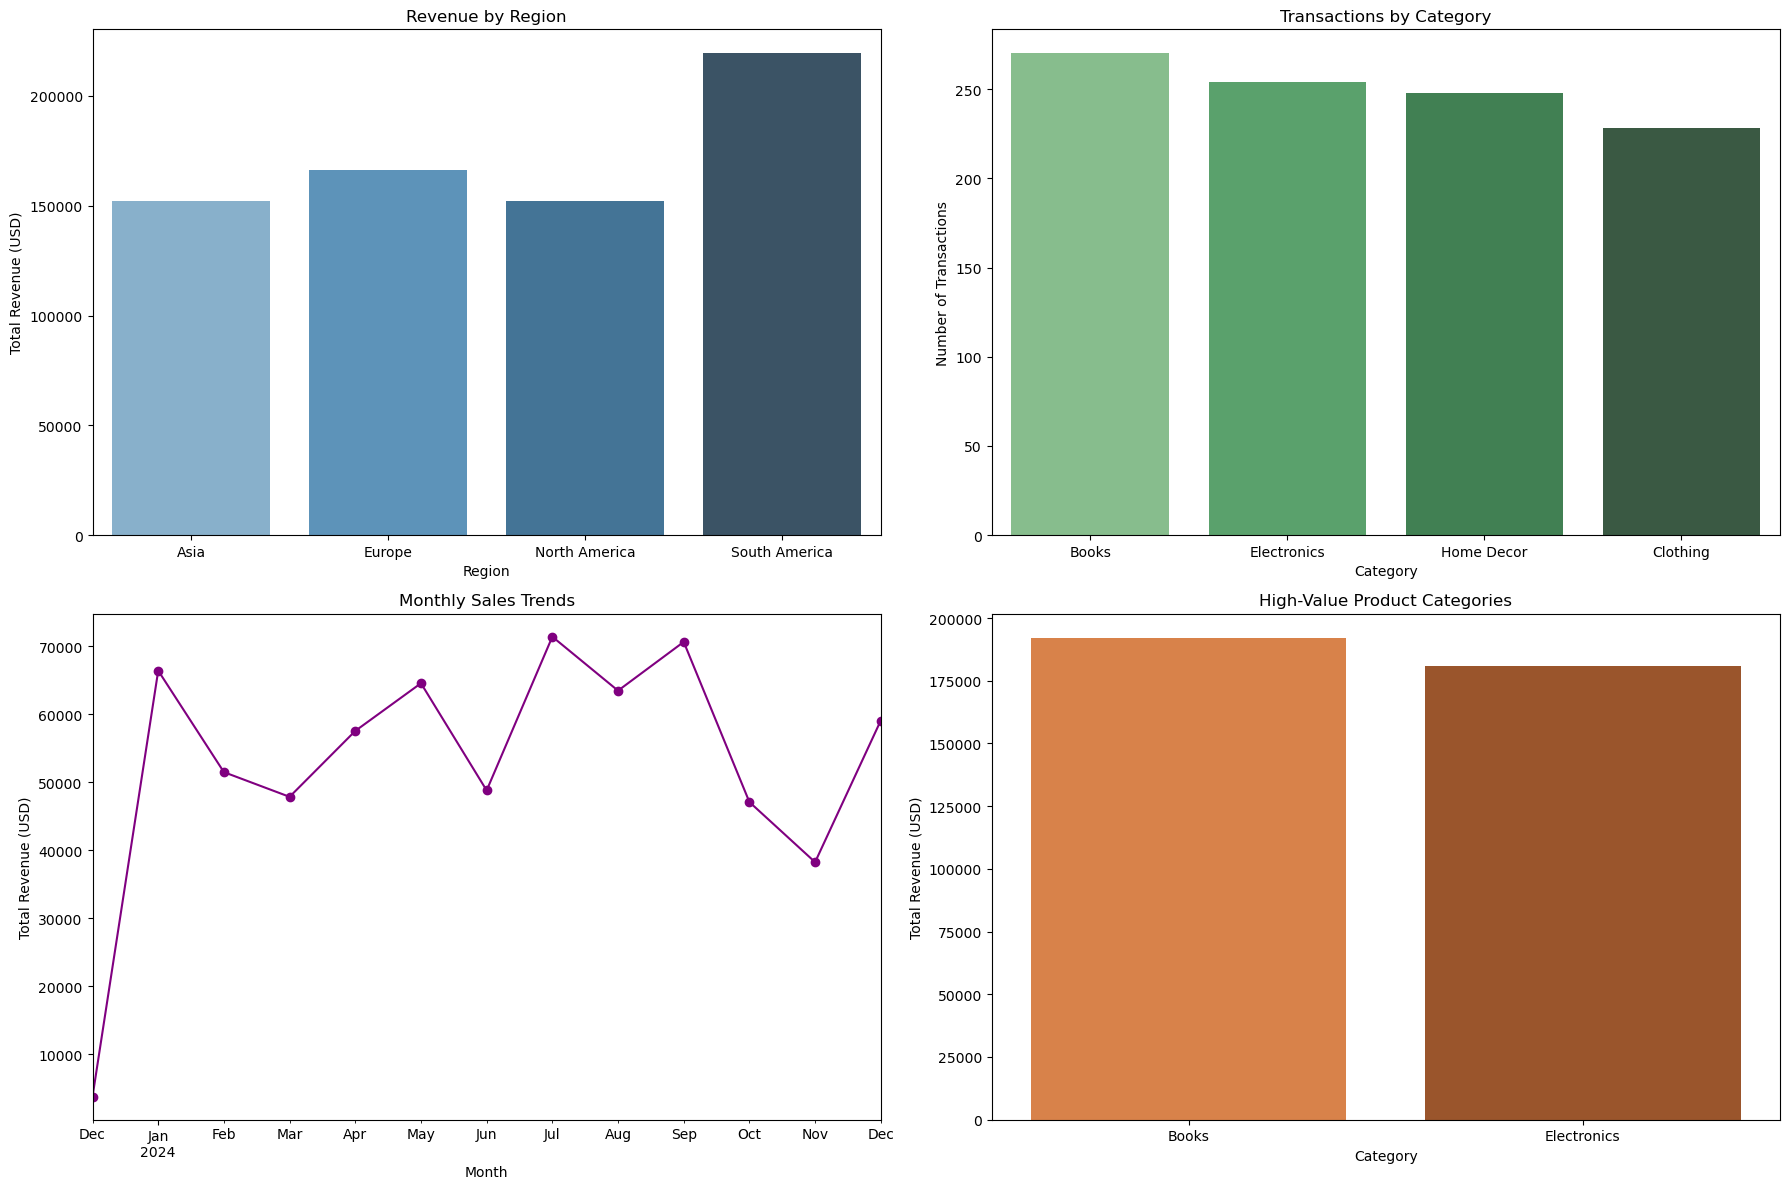

In [7]:
# Create visualizations to accompany the report
plt.figure(figsize=(18, 12))

# Revenue by region
plt.subplot(2, 2, 1)
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="Blues_d")
plt.title("Revenue by Region")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Region")

# Transactions by product category
plt.subplot(2, 2, 2)
sns.barplot(x=category_transactions.index, y=category_transactions.values, palette="Greens_d")
plt.title("Transactions by Category")
plt.ylabel("Number of Transactions")
plt.xlabel("Category")

# Monthly sales trends
plt.subplot(2, 2, 3)
monthly_sales.plot(kind="line", marker="o", color="purple")
plt.title("Monthly Sales Trends")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Month")

# High-value categories
plt.subplot(2, 2, 4)
sns.barplot(x=high_value_categories.index, y=high_value_categories.values, palette="Oranges_d")
plt.title("High-Value Product Categories")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Category")

plt.tight_layout()
plt.savefig('visualizations.png')
plt.show()


In [8]:
# Print confirmation message
print(f"PDF report has been saved as: {pdf_path}")
print("Visualizations have been created and saved as 'visualizations.png'.")


PDF report has been saved as: Business_Insights_Report.pdf
Visualizations have been created and saved as 'visualizations.png'.
